In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ARIMA model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Customized functions to do ARIMA modeling
import functions.crop_by_country_arima_analyses as ca

In [2]:
# Read in processed data
items_by_country = pd.read_csv('../data/processed/items_by_country.csv',index_col=0)
print(items_by_country.shape)

# Put name for years into a column
# The years list is used by the function below when reshaping data frame 
year = items_by_country.columns[5:-1].tolist() # Select year 1986-2017

(223049, 38)


In [55]:
items_by_country.head()

,Reporter Countries,Item,Element,Unit,Item Code,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,NoneZero
0,Afghanistan,Almonds shelled,Export Quantity,tonnes,5313,0.0,0.0,0.0,0.0,0.0,...,4763.0,1308.0,2261.0,0.0,0.0,2714.0,2086.0,1778.0,2756.0,7
1,Afghanistan,Almonds shelled,Export Value,1000 US$,5313,0.0,0.0,0.0,0.0,0.0,...,35476.0,15894.0,20270.0,0.0,0.0,16454.0,12793.0,10934.0,19677.0,7
2,Afghanistan,Almonds shelled,Import Quantity,tonnes,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,168.0,181.0,846.0,103.0,4
3,Afghanistan,Almonds shelled,Import Value,1000 US$,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1117.0,1377.0,4988.0,759.0,4
4,Afghanistan,"Almonds, with shell",Export Quantity,tonnes,3315,0.0,0.0,0.0,0.0,0.0,...,11066.0,779.0,1016.0,0.0,0.0,1856.0,1660.0,1545.0,875.0,7


From previous analysis (2_exploratory-analysis-agtrade.ipynb),top five exported crops between 1986 and 2017 in quantities (tonnes) are:   
1) Wheat, 2)Maize, 3)Soybeans, 4)Barley and 5)Rice - total  (Rice milled equivalent)  

We shall build an ARIMA model for each crop of every exporting country, and forecast export into 2025.

### 1. ARIMA modeling for top-five export crops in total quantity between 1986 and 2017

#### 1) Wheat

76 country names selected for those with >50% non-zero data
There were 12 non-stationary countries being removed and
 result in 64 stationary countries


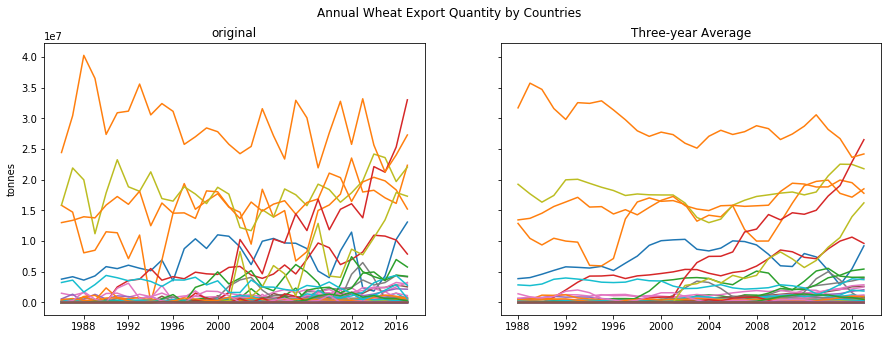

In [3]:
# Assign variables
data = items_by_country.copy()

# For Wheat 
item = 'Wheat'
element = 'Export Quantity' # or Export/Import Value
years = year
unit = 'tonnes' # 1000 US$ for value

# Step 1: preprocessing data
df = ca.crop_country_preprocess(data, years, item, element, plot=True)

df_original = df[0]
df_processed = df[1]

In [ ]:
# Step 2: parameter optimazation for ARIMA
# df_arima = ca.crop_country_arima(df_processed, item, element, plot=True)

In [4]:
import ast # for importing best_arima as tuples not strings
df_arima = pd.read_csv('../data/processed/arima_Wheat_Export Quantity_.csv',
                       converters={"best_arima": ast.literal_eval},
                       index_col='country')

In [6]:
# Step 3: use best ARIMA model to forecast

# need to specify n_periods = ? if want to change number of years forecasted
# n_periods = 8 is default
wheat_forecast = ca.crop_country_forecast(df_processed,df_arima)

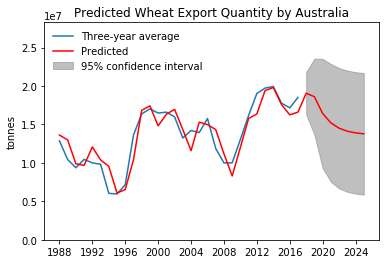

In [9]:
# Unpack results for plotting
forecast_values, lower_ci_values, upper_ci_values = wheat_forecast

# Visualize a few countries
country = 'Australia'
fig = ca.plot_forecast(country, df_processed, forecast_values, lower_ci_values, upper_ci_values,
                  item=item,element=element,unit=unit)

#### 2). Maize

96 country names selected for those with >50% non-zero data
There were 15 non-stationary countries being removed and
 result in 81 stationary countries


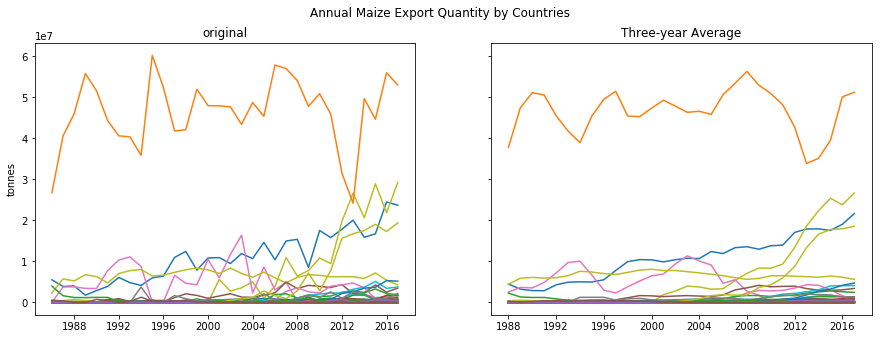

In [13]:
# For Maize 
item = 'Maize'
element = 'Export Quantity' # or Export/Import Value
years = year
unit = 'tonnes' # 1000 US$ for value

# Step 1: preprocessing data
df_original, df_processed= ca.crop_country_preprocess(data, years, item, element, plot=True)

Argentina (1, 0, 2) MSE=2.09E+12
Australia (1, 0, 2) MSE=1.51E+08
Barbados (1, 0, 0) MSE=7.94E+00
Belgium (1, 0, 0) MSE=3.22E+09
Benin (3, 0, 0) MSE=2.26E+07
Bolivia (Plurinational State of) (1, 0, 0) MSE=5.24E+07
Botswana (1, 0, 0) MSE=7.91E+03
Brazil (3, 0, 0) MSE=8.56E+12
Bulgaria (1, 0, 0) MSE=6.69E+10
Burkina Faso (2, 0, 0) MSE=6.10E+07
Cameroon (1, 0, 0) MSE=1.75E+05
Canada (2, 0, 0) MSE=2.83E+10
Chile (1, 0, 2) MSE=9.44E+07
China, Taiwan Province of (1, 0, 1) MSE=8.31E+05
China, mainland (1, 0, 2) MSE=1.24E+12
Colombia (1, 0, 0) MSE=2.61E+05
Costa Rica (1, 0, 0) MSE=2.25E+04
Croatia (4, 0, 0) MSE=3.04E+09
Czechia (1, 0, 0) MSE=1.85E+09
Côte d'Ivoire (1, 0, 0) MSE=6.00E+07
Denmark (1, 0, 0) MSE=9.25E+08
Ecuador (4, 0, 1) MSE=1.29E+07
Egypt (0, 0, 2) MSE=4.05E+07
El Salvador (0, 0, 2) MSE=1.60E+06
Estonia (0, 0, 2) MSE=5.13E+05
Finland (1, 0, 0) MSE=1.01E+00
France (1, 0, 1) MSE=7.76E+10
Georgia (1, 0, 0) MSE=5.48E+07
Germany (6, 0, 0) MSE=4.00E+09
Greece (1, 0, 0) MSE=5.25E+08
Gu

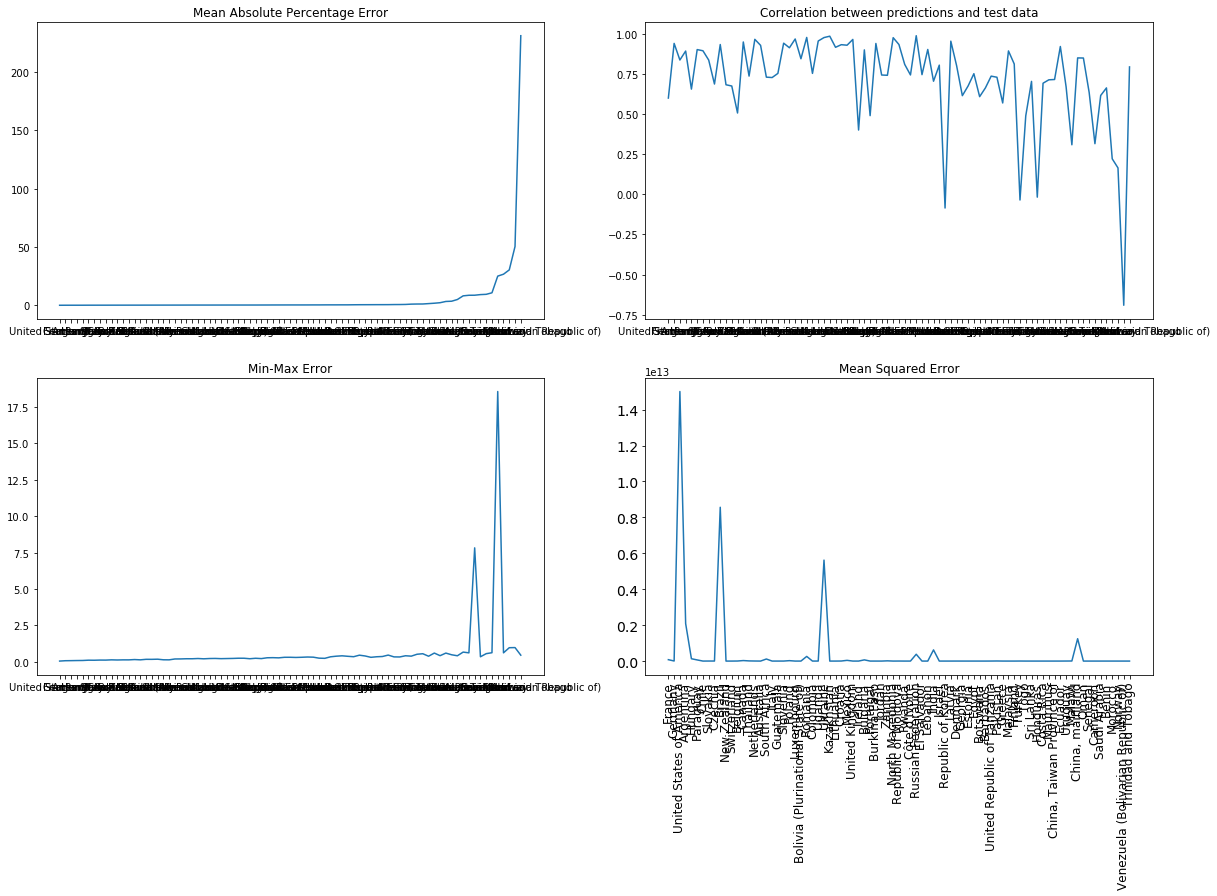

In [14]:
# Step 2: parameter optimazation for ARIMA
df_arima = ca.crop_country_arima(df_processed, item, element, plot=True)

In [45]:
# Step 3: use best ARIMA model to forecast

maize_forecast = ca.crop_country_forecast(df_processed,df_arima)

# Unpack results for plotting
forecast_values, lower_ci_values, upper_ci_values = maize_forecast

# Visualize a few countries
country = Australia'
fig = ca.plot_forecast(country, df_processed, forecast_values, lower_ci_values, upper_ci_values,
                  item=item,element=element,unit=unit)

SyntaxError: EOL while scanning string literal (<ipython-input-45-be6506ee3217>, line 9)

#### 3) Soybeans

63 country names selected for those with >50% non-zero data
There were 9 non-stationary countries being removed and
 result in 54 stationary countries


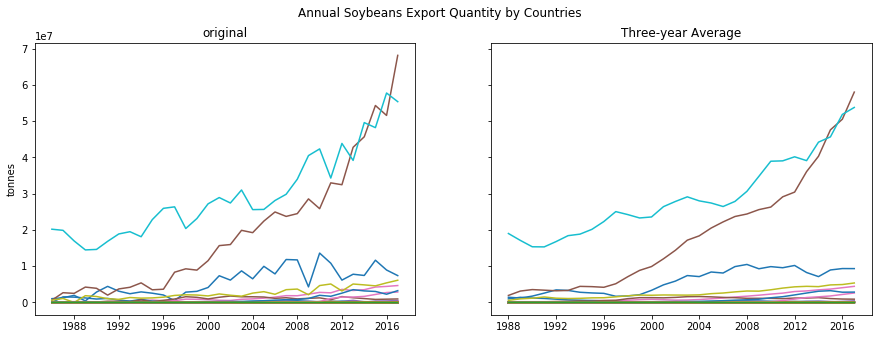

In [42]:
# For Soybeans 
item = 'Soybeans'
element = 'Export Quantity' # or Export/Import Value
years = year
unit = 'tonnes' # 1000 US$ for value

# Step 1: preprocessing data
df_original, df_processed= ca.crop_country_preprocess(data, years, item, element, plot=True)

Argentina (1, 0, 0) MSE=1.17E+12
Australia (0, 0, 2) MSE=5.85E+05
Austria (5, 0, 0) MSE=3.45E+07
Belgium (1, 0, 0) MSE=7.76E+08
Brazil (1, 0, 0) MSE=2.06E+13
Canada (1, 0, 0) MSE=1.04E+11
Chile (1, 0, 0) MSE=6.49E+06
China, Hong Kong SAR (1, 0, 0) MSE=2.63E+05
China, Taiwan Province of (1, 0, 0) MSE=1.54E+03
Colombia (0, 0, 2) MSE=2.76E+03
Croatia (1, 0, 0) MSE=6.76E+08
Czechia (1, 0, 0) MSE=1.56E+06
Denmark (1, 0, 2) MSE=5.79E+04
Ecuador (1, 0, 0) MSE=1.56E+06
Egypt (0, 0, 1) MSE=1.50E+07
France (3, 0, 0) MSE=1.03E+08
Germany (6, 0, 1) MSE=1.01E+08
Guatemala (4, 0, 0) MSE=3.10E+04
Honduras (4, 0, 0) MSE=6.97E+02
Hungary (5, 0, 0) MSE=8.34E+07
India (3, 0, 0) MSE=1.41E+09
Indonesia (0, 0, 2) MSE=2.64E+07
Iran (Islamic Republic of) (1, 0, 0) MSE=1.10E+05
Ireland (0, 0, 1) MSE=6.94E+05
Italy (4, 0, 0) MSE=1.60E+08
Japan (1, 0, 0) MSE=1.39E+04
Kazakhstan (1, 0, 0) MSE=1.36E+07
Malawi (1, 0, 0) MSE=2.31E+07
Malaysia (2, 0, 0) MSE=4.78E+07
Mexico (1, 0, 0) MSE=4.98E+03
Netherlands (4, 0, 2)

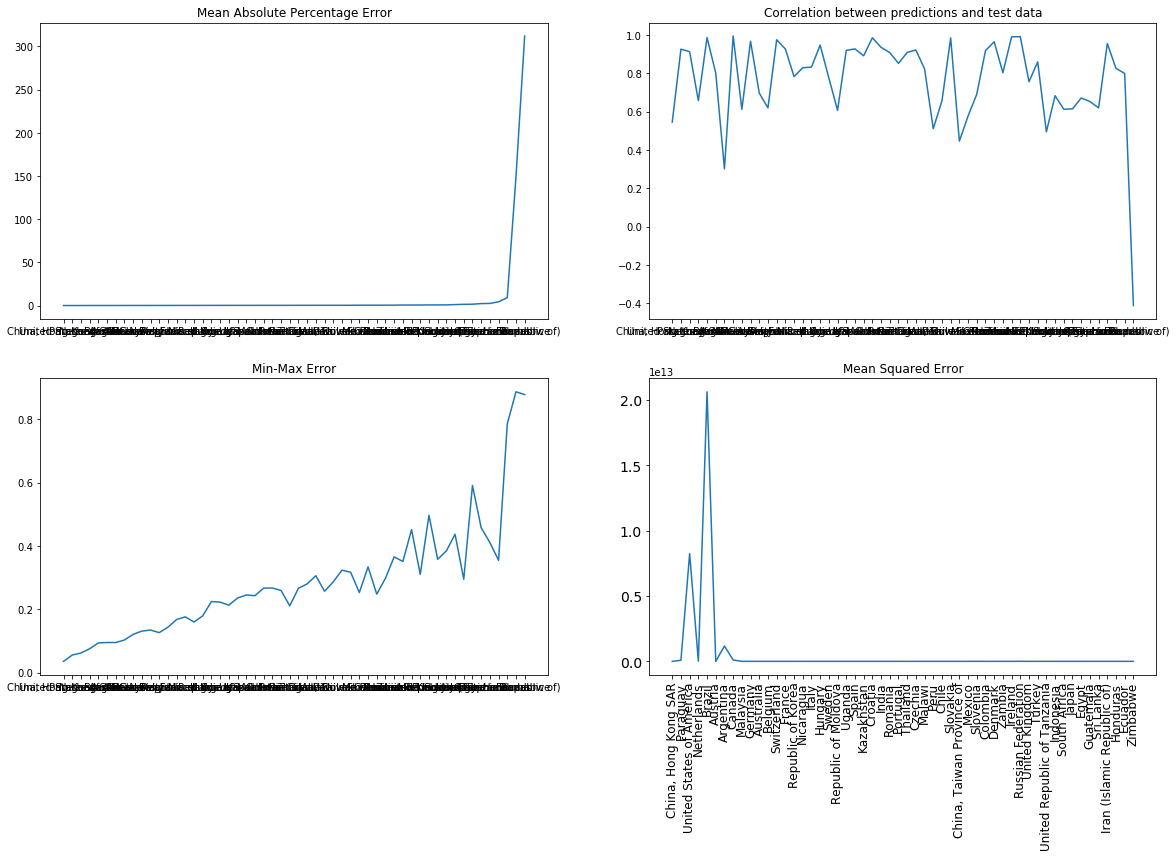

In [21]:
# Step 2: parameter optimazation for ARIMA
df_arima = ca.crop_country_arima(df_processed, item, element, plot=True)

In [ ]:
# Step 3: use best ARIMA model to forecast

import ast # for importing best_arima as tuples not strings
df_arima = pd.read_csv('../data/processed/arima_Soybeans_Export Quantity_.csv',
                       converters={"best_arima": ast.literal_eval},
                       index_col='country')

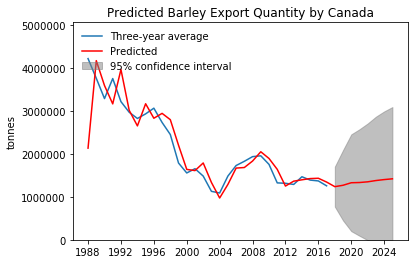

In [50]:
soybean_forecast = ca.crop_country_forecast(df_processed,df_arima)

# Unpack results for plotting
forecast_values, lower_ci_values, upper_ci_values = soybean_forecast

# Visualize a few countries
country = 'Canada'
fig = ca.plot_forecast(country, df_processed, forecast_values, lower_ci_values, upper_ci_values,
                  item=item,element=element,unit=unit)

4) Barley

58 country names selected for those with >50% non-zero data
There were 10 non-stationary countries being removed and
 result in 48 stationary countries


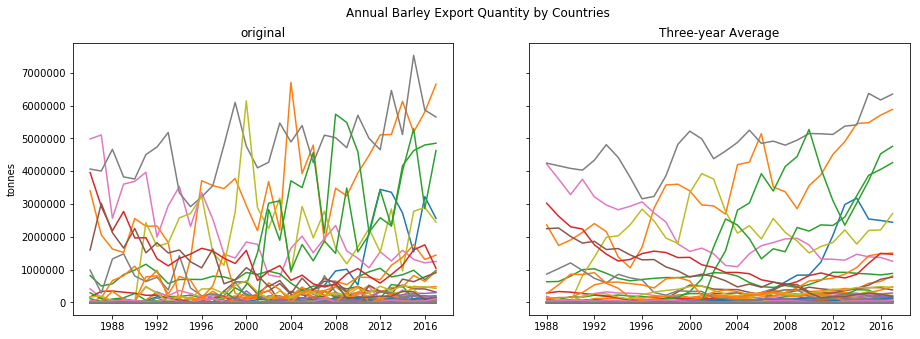

In [48]:
# For Barley
item = 'Barley'
element = 'Export Quantity' # or Export/Import Value
years = year
unit = 'tonnes' # 1000 US$ for value

# Step 1: preprocessing data
df_original, df_processed= ca.crop_country_preprocess(data, years, item, element, plot=True)

Australia (4, 0, 0) MSE=2.93E+11
Austria (5, 0, 1) MSE=1.88E+08
Belarus (1, 0, 0) MSE=2.17E+07
Belgium (5, 0, 2) MSE=7.92E+08
Bulgaria (4, 0, 0) MSE=3.00E+09
Canada (4, 0, 2) MSE=2.04E+10
Chile (4, 0, 1) MSE=1.06E+05
China, Hong Kong SAR (2, 0, 0) MSE=7.39E+01
China, mainland (1, 0, 0) MSE=1.24E+08
Croatia (1, 0, 0) MSE=6.72E+07
Czechia (2, 0, 2) MSE=1.89E+09
Ecuador (1, 0, 0) MSE=3.21E+04
Estonia (1, 0, 0) MSE=1.07E+09
Ethiopia (2, 0, 0) MSE=2.07E+02
France (4, 0, 0) MSE=1.74E+11
Germany (6, 0, 0) MSE=7.33E+10
Greece (3, 0, 0) MSE=5.87E+06
Guatemala (3, 0, 1) MSE=3.79E-01
Hungary (4, 0, 0) MSE=6.74E+09
India (2, 0, 0) MSE=8.25E+09
Italy (1, 0, 0) MSE=1.58E+07
Kazakhstan (3, 0, 1) MSE=1.06E+10
Kenya (1, 0, 0) MSE=1.40E+06
Latvia (1, 0, 0) MSE=5.27E+08
Lithuania (1, 0, 0) MSE=2.63E+09
Luxembourg (2, 0, 0) MSE=2.64E+06
Malaysia (2, 0, 1) MSE=3.47E+03
Norway (5, 0, 0) MSE=3.84E+03
Oman (4, 0, 2) MSE=1.24E+05
Pakistan (2, 0, 0) MSE=2.37E+05
Peru (1, 0, 0) MSE=3.24E+03
Poland (2, 0, 0) MSE=

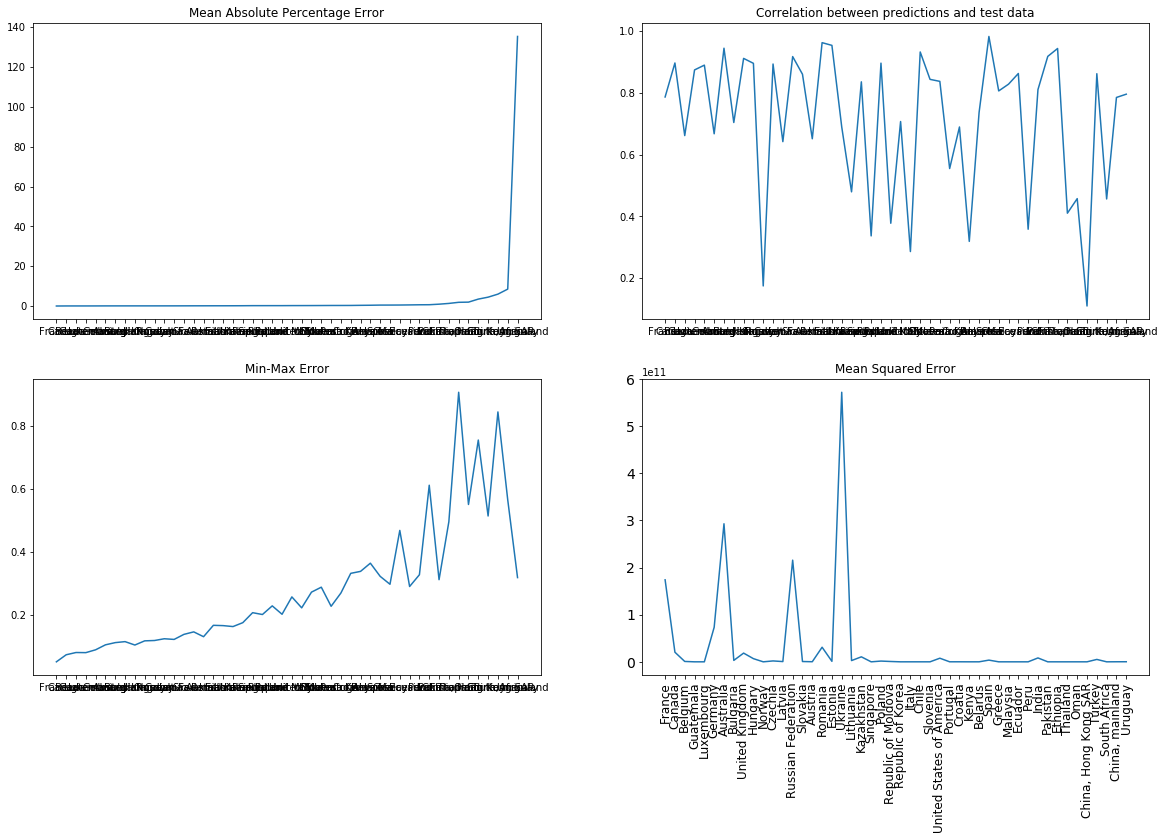

In [49]:
# Step 2: parameter optimazation for ARIMA
df_arima = ca.crop_country_arima(df_processed, item, element, plot=True)

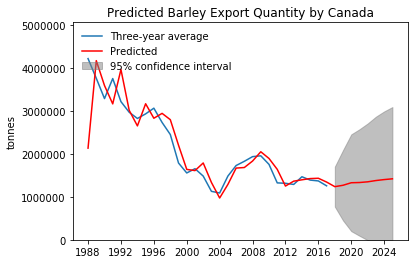

In [51]:
barley_forecast = ca.crop_country_forecast(df_processed,df_arima)

# Unpack results for plotting
forecast_values, lower_ci_values, upper_ci_values = barley_forecast

# Visualize a few countries
country = 'Canada'
fig = ca.plot_forecast(country, df_processed, forecast_values, lower_ci_values, upper_ci_values,
                  item=item,element=element,unit=unit)

5) Rice

102 country names selected for those with >50% non-zero data
There were 19 non-stationary countries being removed and
 result in 83 stationary countries


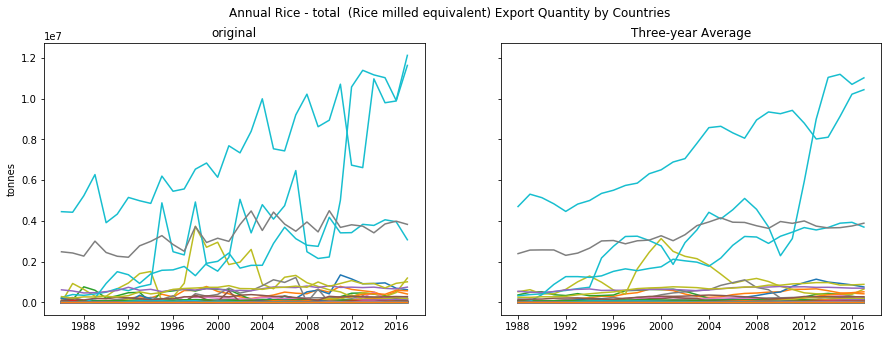

In [74]:
# For Rice
item = 'Rice - total  (Rice milled equivalent)'
element = 'Export Quantity' # or Export/Import Value
years = year
unit = 'tonnes' # 1000 US$ for value

# Step 1: preprocessing data
df_original, df_processed= ca.crop_country_preprocess(data, years, item, element, plot=True)
# Rice - total (Rice milled equivalent)

Argentina (3, 0, 1) MSE=3.97E+09
Australia (1, 0, 2) MSE=1.88E+09
Austria (2, 0, 0) MSE=4.06E+05
Bahrain (1, 0, 0) MSE=1.39E+04
Belgium (5, 0, 0) MSE=1.42E+08
Bolivia (Plurinational State of) (4, 0, 1) MSE=3.92E+05
Botswana (1, 0, 0) MSE=2.16E+06
Brazil (1, 0, 0) MSE=2.15E+10
Bulgaria (1, 0, 0) MSE=5.30E+07
Cameroon (1, 0, 0) MSE=7.46E+06
Canada (1, 0, 0) MSE=8.43E+05
China, Hong Kong SAR (1, 0, 1) MSE=1.79E+05
China, Macao SAR (1, 0, 0) MSE=1.10E+04
China, Taiwan Province of (4, 0, 0) MSE=7.44E+07
China, mainland (1, 0, 2) MSE=2.56E+10
Croatia (0, 0, 2) MSE=8.49E+02
Czechia (4, 0, 1) MSE=6.20E+05
Côte d'Ivoire (1, 0, 0) MSE=4.77E+07
Denmark (1, 0, 2) MSE=3.19E+05
Egypt (3, 0, 0) MSE=1.17E+10
El Salvador (1, 0, 0) MSE=3.32E+06
Estonia (4, 0, 0) MSE=6.65E+03
Fiji (0, 0, 2) MSE=3.82E+04
France (1, 0, 2) MSE=1.53E+07
Germany (6, 0, 0) MSE=5.53E+07
Greece (1, 0, 2) MSE=1.27E+08
Guatemala (2, 0, 0) MSE=1.50E+05
Guyana (4, 0, 0) MSE=2.56E+09
Honduras (1, 0, 0) MSE=1.28E+06
Hungary (1, 0, 0) 

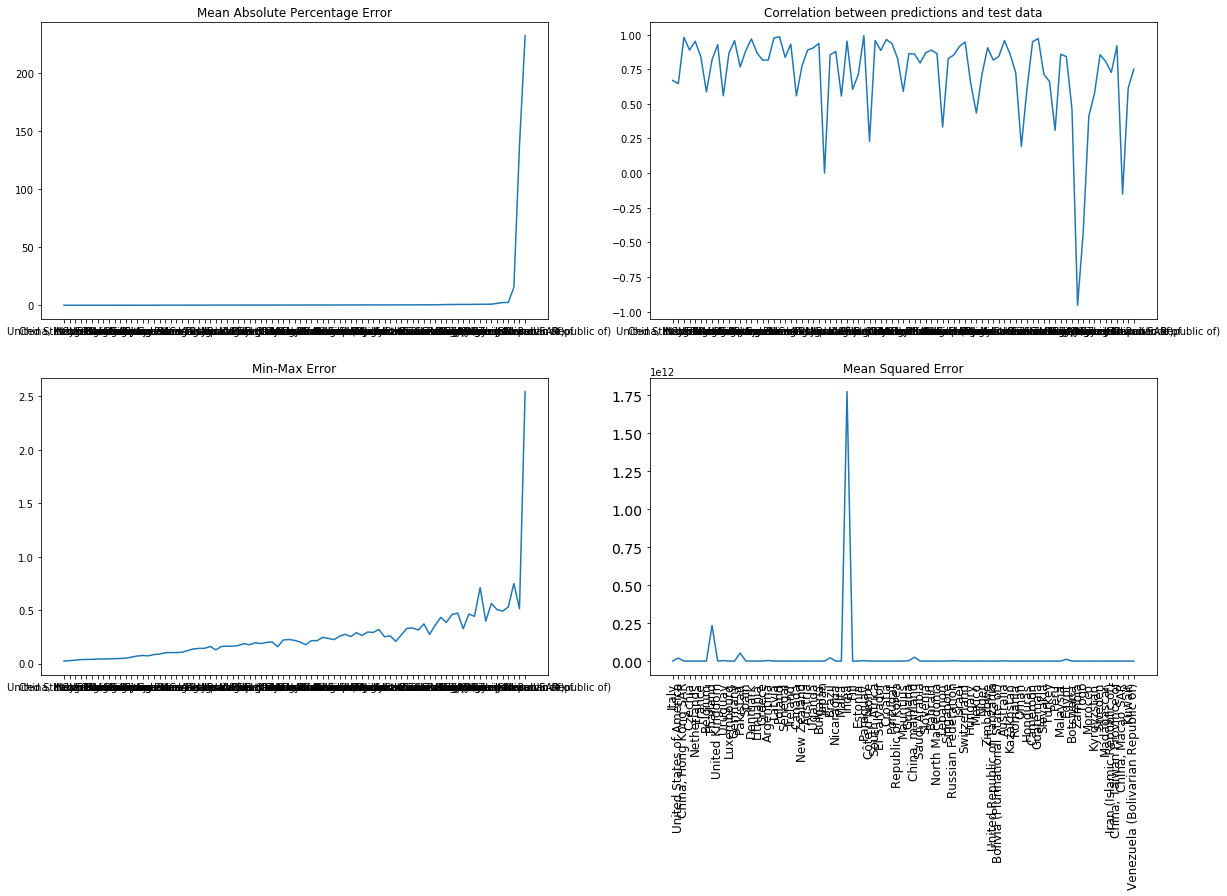

In [75]:
# Step 2: parameter optimazation for ARIMA
df_arima = ca.crop_country_arima(df_processed, item, element, plot=True)

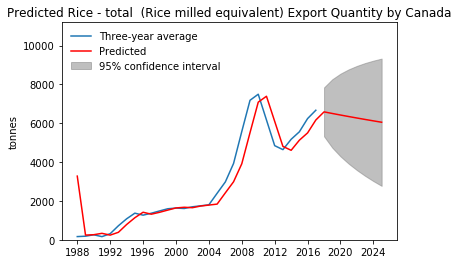

In [76]:
rice_forecast = ca.crop_country_forecast(df_processed,df_arima)

# Unpack results for plotting
forecast_values, lower_ci_values, upper_ci_values = rice_forecast

# Visualize a few countries
country = 'Canada'
fig = ca.plot_forecast(country, df_processed, forecast_values, lower_ci_values, upper_ci_values,
                  item=item,element=element,unit=unit)

In [77]:
def plot_arima_metrics(data, metric):  
    # metric = 'mape','corr','minmax', or 'mse'
    '''function to plot evaluation metrics of ARIMA models'''
    data = df_arima.sort_values(by=metric)
    plt.plot(data.index,data[metric],figsize=(20, 12))
    plt.xticks(rotation=90)
    ax.plot(data[metric])
    
    return fig

In [99]:
data = df_arima.sort_values(by='mape')

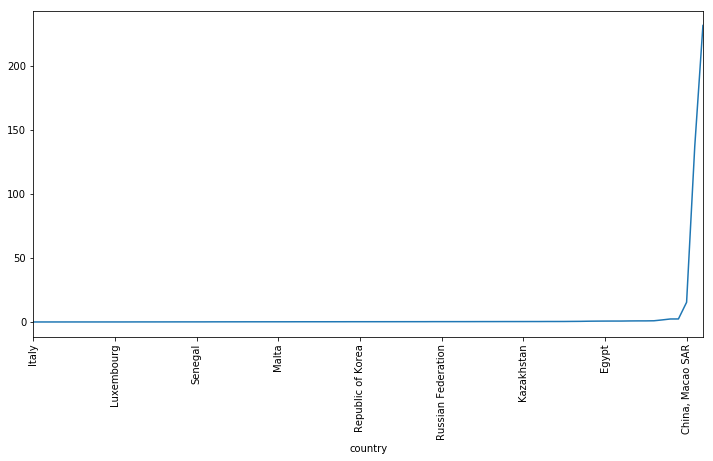

In [107]:
data['mape'].sort_values().plot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

Issues to come back: plotting evaluation metrics and remove bad fits  
Put all steps in a pipeline and loop through the crops?
